In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
sns.set()

In [15]:
labelencoder = LabelEncoder()

In [24]:
led = LabelEncoder()

In [4]:
data = pd.read_excel('week2_challenge_data_source.xlsx')
#data.info()

In [81]:
telcomdata=data.copy()
#telcomdata.head(10)

In [82]:
#encoding categorical features
col = telcomdata['Handset Type']
telcomdata = telcomdata.apply(lambda col: labelencoder.fit_transform(col.astype(str)), axis=0, result_type='expand')


In [83]:
#encoding categorical features
col = telcomdata['Handset Type']
telcomdata= telcomdata.apply(lambda col: labelencoder.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [84]:
#encoding manufacturer type
col1 = telcomdata['Handset Manufacturer']
telcomdata = telcomdata.apply(lambda col: led.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [85]:
telcomdata.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,87594,0,692,27888,543,19353,40884,62921,31130,19758,...,132779,46007,83857,96234,125246,134279,92104,84140,147038,128363
1,87598,51014,569,27677,467,59469,3112,88989,69624,9667,...,21997,16439,5161,148277,100540,101754,36611,142969,74691,89068
2,87606,100395,1,27799,530,57447,62851,106019,91170,38339,...,17343,124693,147935,63688,113569,41351,8005,43522,104678,121904
3,87607,861,303,27644,770,36047,33322,102639,14517,15028,...,32182,128849,116260,22403,86033,36233,74014,115181,37597,90507
4,87617,34965,410,27766,943,31241,27211,101822,22734,41344,...,127537,15101,143928,105493,36002,36010,42456,128936,7895,40110


In [86]:
features = telcomdata.columns
x = telcomdata.loc[:, features].values
x = StandardScaler().fit_transform(x) 
x.shape

(150001, 55)

In [87]:
np.mean(x),np.std(x)

(-1.3440041562605744e-17, 0.9999999999999998)

In [88]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54
149996,-0.896813,-1.278736,-0.846361,1.408392,-0.763967,0.797421,-0.435115,-0.991367,-0.822226,0.866017,...,1.413387,0.071687,-1.705779,-1.229818,-0.906752,0.336728,1.444860,1.138620,0.260298,-0.778549
149997,-0.040302,-1.278736,-0.697665,1.717743,1.655988,1.272251,1.634891,0.085827,-0.098461,1.558402,...,0.939025,0.204023,-1.403708,-0.881936,0.306568,-0.548798,-0.230576,-1.226692,-1.465233,1.051312
149998,1.479366,-1.278674,-1.638256,1.723065,0.855115,1.279800,0.299510,0.913867,0.176244,-0.396266,...,-0.728583,-1.468478,0.567278,-0.772656,-0.752237,1.109496,1.370582,0.101347,1.428308,-0.672886
149999,1.479366,-1.278674,0.308630,1.716448,-1.440029,1.270924,-1.206277,1.720020,1.289508,-0.993221,...,0.335267,0.207360,-0.255017,0.825221,1.580516,-1.187183,0.342839,1.306406,0.840347,1.572261
150000,-1.751235,-1.278642,-0.569717,-1.650012,-0.573283,1.328926,1.016834,0.879506,0.990281,0.732491,...,-0.337729,-1.142252,-0.369052,-1.163755,-1.498226,0.078079,-1.489814,0.061483,0.582059,0.591289


In [89]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [90]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [91]:
principal_breast_Df.tail()

,principal component 1,principal component 2
149996,-1.845478,-0.565454
149997,-1.782786,-0.116314
149998,-2.006704,0.187015
149999,-1.673293,-0.165192
150000,4.169085,12.614801


In [92]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.12030728 0.03886087]


<ul>
<li>The initial data with 55 features have been reduced to only 2 features/li>
<li>Principal component 1 contains 12% of the features while principal component 2 contains 3% of the features</li>
<li>In all, only 15% of the features are retained and 85% lost</li>
<li>This is not a good fit of the data.</li>
</ul>

In [573]:
#Deciles and computing the DL + UL for the top 5 decile class
telcomdata['Decile_rank'] = pd.qcut(telcomdata['Dur. (ms)'], 10,duplicates = 'drop'
                            ,labels = False)
dciles = telcomdata.groupby('Decile_rank')
datasum = dciles['total'].sum()
top5 = datasum[:4]
#top5


In [440]:
#Find the total data for each application and create new columns for the totals
telcomdata['Netflix'] = telcomdata['Netflix DL (Bytes)'] + telcomdata['Netflix UL (Bytes)']
telcomdata['YouTube'] = telcomdata['Youtube DL (Bytes)'] + telcomdata['Youtube UL (Bytes)']
telcomdata['Gaming'] = telcomdata['Gaming DL (Bytes)'] + telcomdata['Gaming UL (Bytes)']
telcomdata['Other'] = telcomdata['Other DL (Bytes)'] + telcomdata['Other UL (Bytes)']
telcomdata['Social Media'] = telcomdata['Social Media DL (Bytes)'] + telcomdata['Social Media UL (Bytes)']
telcomdata['Google'] = telcomdata['Google DL (Bytes)'] + telcomdata['Google UL (Bytes)']
telcomdata['Email'] = telcomdata['Email DL (Bytes)'] + telcomdata['Email DL (Bytes)']

In [451]:
telcomdata['total'] = telcomdata['Total DL (Bytes)'] + telcomdata['Total UL (Bytes)']

In [578]:
#make a separate table of only the data totals to work with
totals = telcomdata.iloc[:, 55:]
totals.insert(0, 'MISI',telcomdata['IMSI'])
totals.head()


,MISI,Netflix,YouTube,Gaming,Other,Social Media,Google,Email,total
0,2.082014e+14,17855187.0,18355943.0,292426453.0,180558843.0,1570185.0,2905912.0,7127084.0,345629377.0
1,2.082019e+14,35565545.0,39359124.0,609920783.0,541959383.0,1933278.0,4414096.0,1258092.0,707185356.0
2,2.082003e+14,23751202.0,34425237.0,229980251.0,414908351.0,1726277.0,10229119.0,5380302.0,307690973.0
3,2.082014e+14,15092588.0,36534765.0,810387875.0,761837216.0,657493.0,11811761.0,2879508.0,889352748.0
4,2.082014e+14,17539799.0,34222253.0,531237049.0,564619822.0,912788.0,7748843.0,3872992.0,607681403.0


In [94]:
#Corelation analysis
cordata =  telcomdata.iloc[:, 55:-1]
cor = cordata.corr(method ='pearson')


In [586]:
cor

,Netflix,YouTube,Gaming,Other,Social Media,Google,Email
Netflix,1.000000,0.002882,-0.003109,-0.009033,0.001013,-0.001902,0.000971
YouTube,0.002882,1.000000,-0.002999,0.002969,0.000548,0.002277,-0.001736
Gaming,-0.003109,-0.002999,1.000000,-0.002661,0.001082,-0.000994,-0.000035
Other,-0.009033,0.002969,-0.002661,1.000000,0.006065,-0.001727,-0.000352
Social Media,0.001013,0.000548,0.001082,0.006065,1.000000,-0.001708,0.004833
Google,-0.001902,0.002277,-0.000994,-0.001727,-0.001708,1.000000,-0.000428
Email,0.000971,-0.001736,-0.000035,-0.000352,0.004833,-0.000428,1.000000


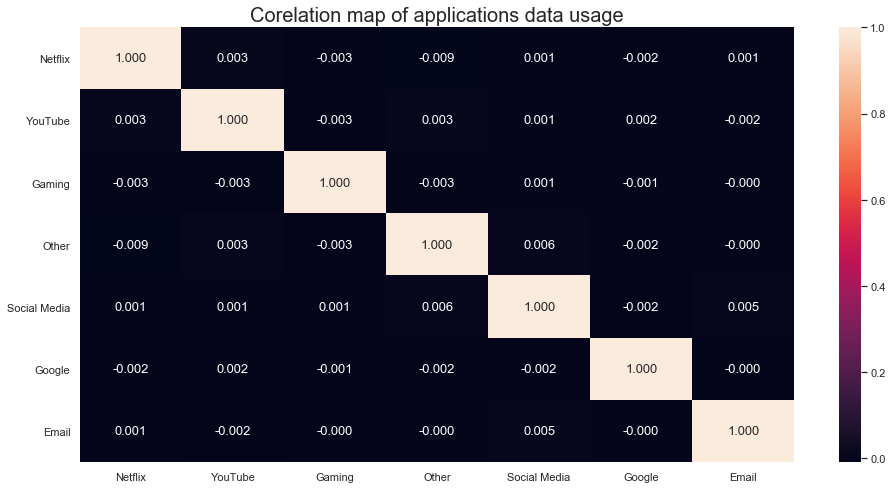

In [588]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(cor,
                annot=True,
                fmt=".3f",
                annot_kws={'size':13},
                )

plt.title("Corelation map of applications data usage", fontsize=20)
plt.show()

In [455]:
totals.insert(7,'Total',telcomdata['total'])

In [456]:
totals.head()

,MISI,Netflix,YouTube,Gaming,Other,Social Media,Google,Total
0,2.082014e+14,17855187.0,18355943.0,292426453.0,180558843.0,1570185.0,2905912.0,345629377.0
1,2.082019e+14,35565545.0,39359124.0,609920783.0,541959383.0,1933278.0,4414096.0,707185356.0
2,2.082003e+14,23751202.0,34425237.0,229980251.0,414908351.0,1726277.0,10229119.0,307690973.0
3,2.082014e+14,15092588.0,36534765.0,810387875.0,761837216.0,657493.0,11811761.0,889352748.0
4,2.082014e+14,17539799.0,34222253.0,531237049.0,564619822.0,912788.0,7748843.0,607681403.0


In [497]:
dff = totals.copy()
df= dff.sort_values(["Total"], ascending = False)

In [481]:
dat = df.head(10)
dat.rename(columns = {'MISI' : 'Customer_id'},inplace = True)

C:\Users\Programms\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [499]:
valu = []
dlabels = ['Netflix', 'YouTube','Gaming','Other','Social Media','Google']
for i in dlabels:
    su = float('{0:.2f}'.format(dff[i].sum(axis = 0)*(1*10**-9)))
    valu.append(su)
valu

[3394.31, 3396.55, 64550.4, 64405.23, 274.24, 1171.1]

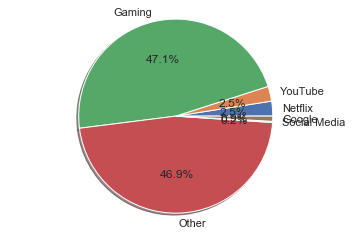

In [505]:
fig1, ax1 = plt.subplots()
ax1.pie(valu, labels=dlabels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

No handles with labels found to put in legend.


Text(0.5, 0, 'Application')

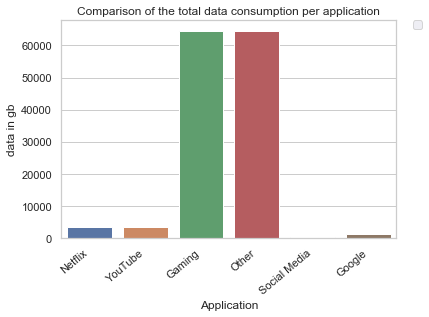

In [504]:
with sns.axes_style("whitegrid"):
    chart = sns.barplot(x=dlabels, y=valu)
    chart.set_xticklabels(rotation=40, ha="right", labels= dlabels)
plt.title("Comparison of the total data consumption per application")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
plt.ylabel('data in gb')
plt.xlabel('Application')


We can see that Gaming and  other applications not known to us are the areas where customers use their data mostly. The insight here is that, we need to dig deeper to understand which are those 'other' and also find out why Gaming seems to be one of the areas where customers spend their data on. Could it be that gaming applications are by nature data consumming or customers actually spend more time with gaming applications that results in the most chunk of their data going into gaming. We could investigate to see if customers actually spend more time gaming  by examining the session duration for gaming applications.

In [506]:
# with sns.axes_style("whitegrid"):
#     chart = sns.barplot(x="Customer_id", y="Netflix",  data=dat)
#     chart.set_xticklabels(rotation=40, ha="right", labels= dat['Customer_id'])
# plt.title("Top 5 customers' Netflix data consumption")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

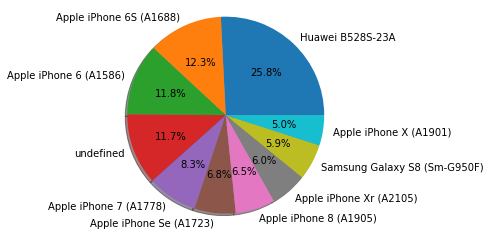

In [422]:
#Top 10 handsets
top10handsets = telcomdata['Handset Type'].value_counts(dropna=True).sort_values(ascending = False).head(10)

top10handsets
sizes = []
for i in top10handsets:
    sizes.append(i)
    
    

#plt.pie([int(v) for v in top10handsets.values()], labels=[string(k) for k in top10handsets.keys()],
          # autopct=None)

labels = ['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined','Apple iPhone 7 (A1778)','Apple iPhone Se (A1723)',
'Apple iPhone 8 (A1905)','Apple iPhone Xr (A2105)','Samsung Galaxy S8 (Sm-G950F)','Apple iPhone X (A1901)']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

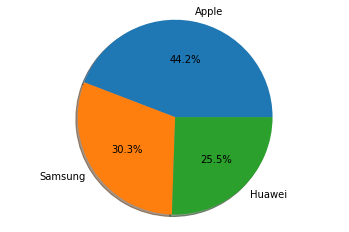

In [426]:
#top3 manufacturers
top3handset_mnf = telcomdata['Handset Manufacturer'].value_counts(dropna=False).sort_values(ascending = False).head(3)
val = []
top3handset_mnf
for j in top3handset_mnf:
    val.append(j)
labels = ['Apple','Samsung','Huawei']


fig1, ax1 = plt.subplots()
ax1.pie(val, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [424]:
top3handset_mnf

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

To get the top 5 Handset types for each of the top 3 Manufacturers, you will first need to know the count of each handset type. You will then group them by manufacturer type and then get the top 5 from each group.

In [366]:
# Add another column for frequency to the data frame
telcomdata['frequency'] = telcomdata['Handset Type'].map(telcomdata['Handset Type'].value_counts())

#group by manufacturer
df1 = telcomdata.groupby(["Handset Manufacturer"])
#sort by frequency which represents the count of each handset 
df2= df1.apply(lambda x: x.sort_values(["frequency"], ascending = False))
df3=df2.reset_index(drop=True)

#dff = df3[['Handset Type', 'frequency']].head(100000)

#df3.drop_duplicates(keep=False,inplace=True)
#df3
#df4 = dff.groupby('Handset Manufacturer').tail(5)

#dd = df3.groupby('Handset Manufacturer')['Handset Type'].value_counts(dropna=False).sort_values(ascending = False).nlargest(5)
#ddd = telcomdata.groupby(['Handset Manufacturer'])['Handset Type'].nunique().count(level=0).nlargest(5)

df4 = df3.groupby('Handset Manufacturer').head(5) 

dfA = df4[df4['Handset Manufacturer'] == 'Apple']
dfA5 = dfA[['Handset Manufacturer', 'Handset Type']]

dfH = df4[df4['Handset Manufacturer'] == 'Huawei']
dfH5 = dfH[['Handset Manufacturer', 'Handset Type']]


dfS = df4[df4['Handset Manufacturer'] == 'Samsung']
dfS5 = dfS[['Handset Manufacturer', 'Handset Type']]



In [507]:
#Top 5 Handsets by Apple
#dfA5


In [508]:
#Top 5 by Huawei
#dfH5

In [509]:
#Top 5 by Samsung
#dfS5

In [33]:
#telcomdata.sort_values(['Handset Type', 'value'], axis=0).groupby('Handset Manufacturer').head(2)

In [368]:
workwith = data.copy()

In [487]:
#total data, both download and upload
workwith['total_dat'] = workwith.loc[:,['Total DL (Bytes)','Total UL (Bytes)']].sum(axis=1)
workwith['total_dat'].sum()*(1*10**-9)

74364.695455661

In [391]:
#workwith.info()

In [435]:
nums = workwith.iloc[:, 39:-1]

In [436]:
#sums of the data fields
nums.sum(axis =0)


Social Media DL (Bytes)    2.693001e+11
Social Media UL (Bytes)    4.939298e+09
Google DL (Bytes)          8.626186e+11
Google UL (Bytes)          3.084833e+11
Email DL (Bytes)           2.687611e+11
Email UL (Bytes)           7.010648e+10
Youtube DL (Bytes)         1.745123e+12
Youtube UL (Bytes)         1.651423e+12
Netflix DL (Bytes)         1.744039e+12
Netflix UL (Bytes)         1.650274e+12
Gaming DL (Bytes)          6.330713e+13
Gaming UL (Bytes)          1.243268e+12
Other DL (Bytes)           6.316550e+13
Other UL (Bytes)           1.239728e+12
Total UL (Bytes)           6.168181e+12
Total DL (Bytes)           6.819651e+13
dtype: float64

In [390]:
nums.describe()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [427]:
#telcomdata.nunique()

In [428]:
#number of xDR sessions per user

#telcomdata.groupby(['IMSI'])['Bearer Id'].count()

In [429]:
#xDR total duration for each customer in minutes
durms = telcomdata.groupby(['IMSI'])['Dur. (ms)'].sum()
durmin =  (durms / (1000*60)) % 60
durmin

IMSI
2.040471e+14    14.497400
2.040808e+14    14.623083
2.082001e+14     1.433650
2.082001e+14     1.437567
2.082001e+14     9.565383
                  ...    
2.082099e+14     2.122783
2.082099e+14     2.809050
2.082099e+14     1.439983
2.082522e+14     0.943550
2.140743e+14     3.779833
Name: Dur. (ms), Length: 107265, dtype: float64

In [430]:
cust = telcomdata['IMSI'].value_counts(dropna=False).sort_values(ascending = False).head(20)
#cust